In [1]:
# Import Static Module
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# Data load
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# Find Missing Value
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [5]:
# Find the outlier and remove
cols_to_check = ['Age', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']

for col in cols_to_check:
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    df = df.loc[(df[col] >= min_val) & (df[col] <= max_val)]

In [6]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

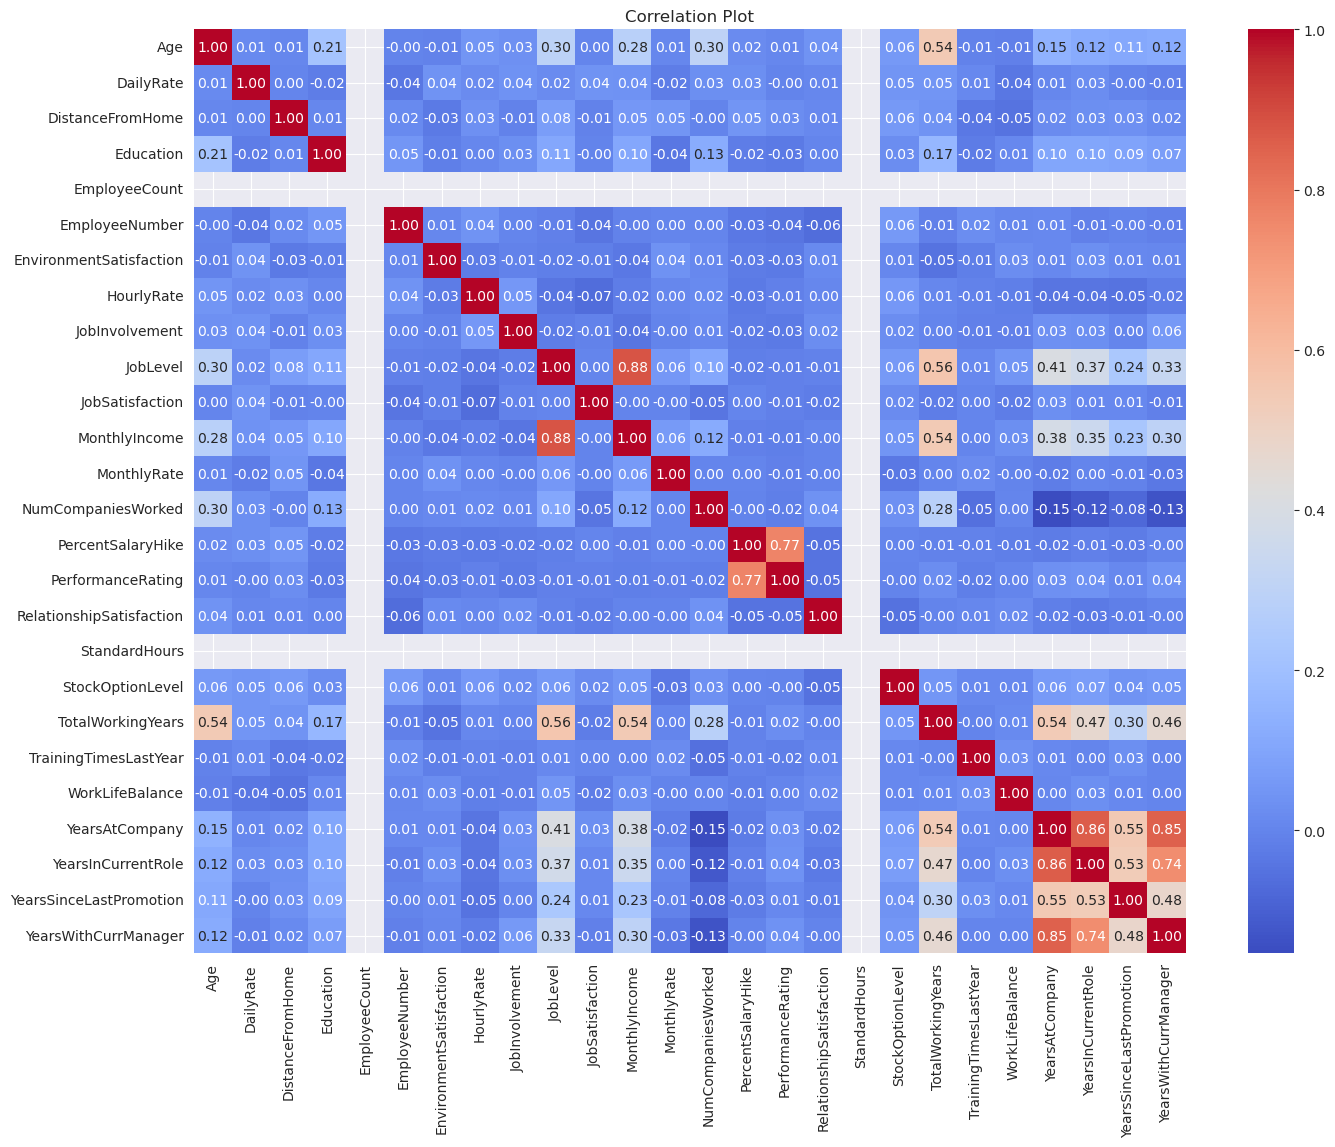

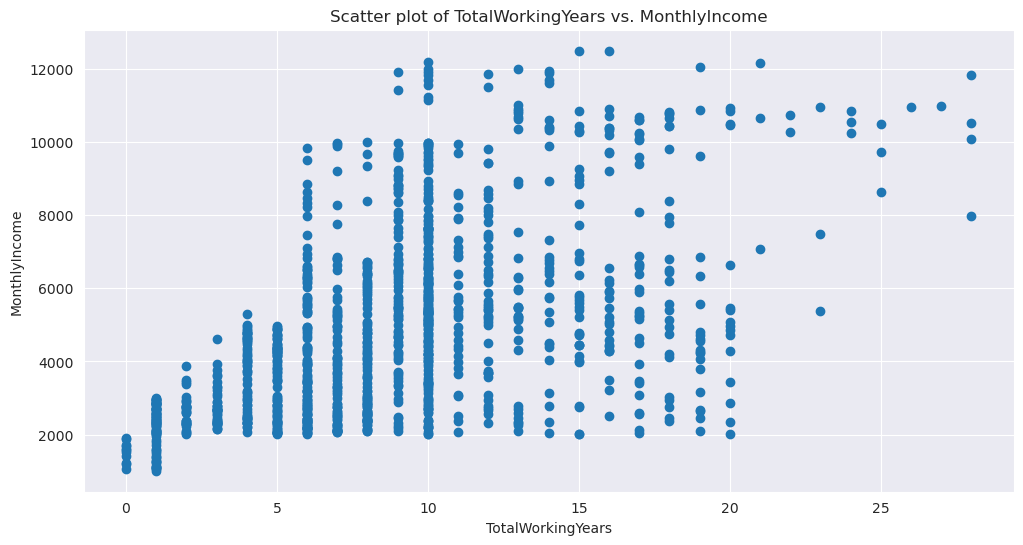

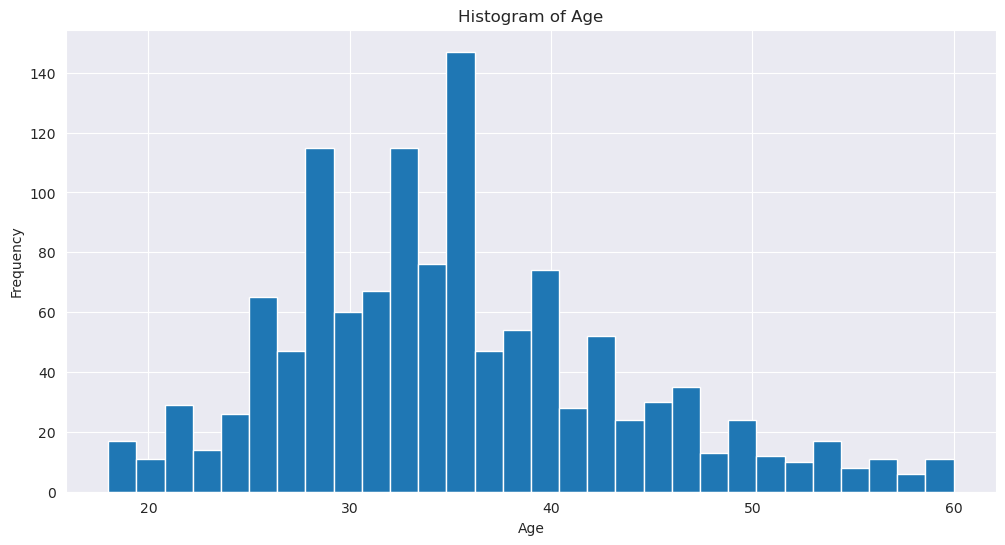

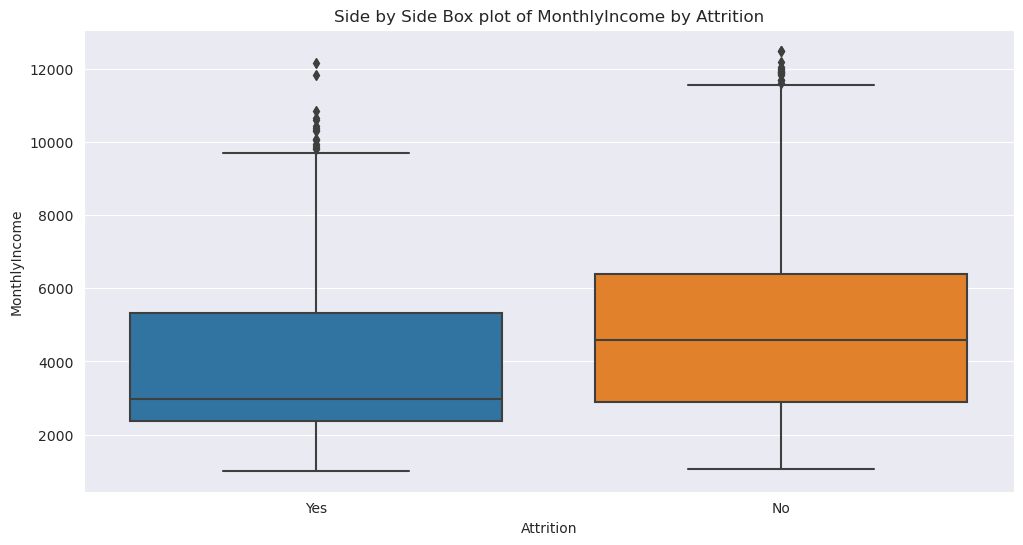

<Figure size 1200x600 with 0 Axes>

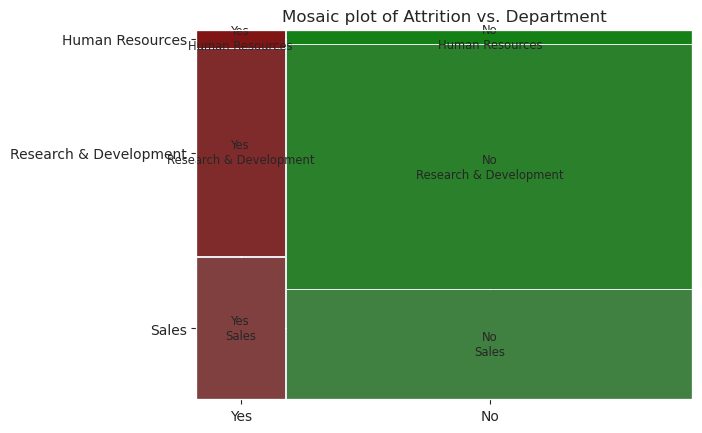

In [7]:
# 1. Correlation Plot
plt.figure(figsize=(16,12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Plot")
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(12,6))
plt.scatter(df['TotalWorkingYears'], df['MonthlyIncome'])
plt.title('Scatter plot of TotalWorkingYears vs. MonthlyIncome')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.show()

# 3. Histogram
plt.figure(figsize=(12,6))
df['Age'].plot(kind='hist', bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

# 4. Side by Side Box Plot
plt.figure(figsize=(12,6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title('Side by Side Box plot of MonthlyIncome by Attrition')
plt.show()

# 5. Mosaic Plot
plt.figure(figsize=(12,6))
mosaic(df, ['Attrition', 'Department'])
plt.title('Mosaic plot of Attrition vs. Department')
plt.show()

In [9]:
df['YearsAtCompanyRate'] = df['YearsAtCompany'] / df['TotalWorkingYears']
df['YearsAtCompanyRate'].replace(np.inf, np.nan, inplace=True)
df[['YearsAtCompany', 'TotalWorkingYears', 'YearsAtCompanyRate']].head()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompanyRate
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,0.750000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,1.000000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1.000000
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0.333333
